<a href="https://colab.research.google.com/github/hifsakazmi/computer-vision-in-python/blob/main/Keras_CNN_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks for Image Classification

Overview:
This guide outlines the process of using a convolutional neural network (CNN) for classifying images from the MNIST dataset. Each step is designed to help you understand the architecture of CNNs and the role of data preprocessing.

# **From Keras datasets import mnist**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

##  Visualizing the Image Data

# **import matplotlib.pyplot as plt**

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# **Check the shape of the data**

In [4]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Traning set shape:", y_train.shape)
print("Test set labels:", y_test.shape)

Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)
Traning set shape: (60000,)
Test set labels: (10000,)


# **check the first image of the dataset**

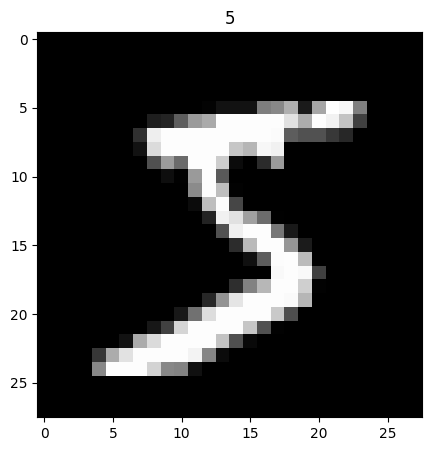

In [5]:
plt.figure(figsize=(5,5))

plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0], fontsize=12)
plt.show()

Check Single Image

## **Note: more values are zero because the image is mostly black**

In [6]:
#more values are zero because the image is mostly black
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

**Check single image shape**
Grayscale image so only one channel

In [7]:

#grayscale image
X_train[0].shape

(28, 28)

Now show the single image here

In [8]:

#has a specific way to showing (Once we get into OpenCV then we can get into this)

#plt.imshow(single_image, cmap='gray')

# PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

## Labels

In [9]:
y_train
#network will think these are values and this is a regression problem

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Hmmm, looks like our labels are literally categories of numbers. We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Luckily , Keras has an easy to use function for this:

In [11]:
from tensorflow.keras.utils import to_categorical

Show y_train shape here (Hint: it should be 60000)

In [12]:
y_train.shape

(60000,)

Here we will be converting the y_train labels of the dataset into a one-hot encoded format using Keras's to_categorical function.

In [13]:
y_example = to_categorical(y_train)

**Show your y_example here**

In [14]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

Show your y_example shape here (Hint: it should be 60000,10)

In [15]:
y_example.shape

(60000, 10)

Check first array = (Hint: y_example[0])

In [16]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

# Convert the integer labels from the test set into a one-hot format.
# 'to_categorical' function is used here to achieve this transformation.
# The second parameter '10' indicates the total number of classes, which are 0-9.

In [17]:
y_cat_test = to_categorical(y_test,10)
#0-9 are the possible results so 10 possible classes

# This conversion allows the model to handle this as a classification problem rather than a regression one.

# Similarly, convert the integer labels from the training set into a one-hot format.
# Ensuring that both training and test labels are processed in the same way for consistent model training.

In [18]:
y_cat_train = to_categorical(y_train,10)

# To understand the result of our one-hot encoding, we will display the one-hot encoded labels for the first sample in the training set.
# This will show a binary vector where one element is '1' indicating the class, and '0's indicating non-membership of other classes.
# Example: For a class label 3, the output will be [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].
# Show the result of one-hot encoding for the first training label

In [19]:
#Show the result of one hot encoding
print(f"y_train[0] label before one-hot encoding: {y_train[0]}")
print(f"y_train[0] label after one-hot encoding: {y_cat_train[0]}")


y_train[0] label before one-hot encoding: 5
y_train[0] label after one-hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Processing X Data

We should normalize the X data manually
Feel more confident if you need to do it yourself

# Check the maximum pixel value in an image from the dataset.
# This is typically 255 for images stored in 8-bit format.

In [20]:
print(f"Max Value: {np.max(X_train[0])}")

Max Value: 255


# Check the minimum pixel value in the same image.
# This is typically 0, indicating no intensity (black).

In [21]:
print(f"Min Value: {np.min(X_train[0])}")

Min Value: 0


# Normalize the pixel values of the training and test datasets to a range of 0 to 1.
# Dividing by 255 as the original range is from 0 to 255.
# This normalization helps in faster convergence during training.

In [22]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Store the normalized version of the first training image to a variable for further examination.

In [23]:
normalized_img = X_train[0]
normalized_img

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Check the maximum pixel value in the normalized image.
# The result should be 1.0, indicating that pixel values are now between 0 and 1.

In [24]:
np.max(normalized_img)

1.0

Uncomment the first line of code and run

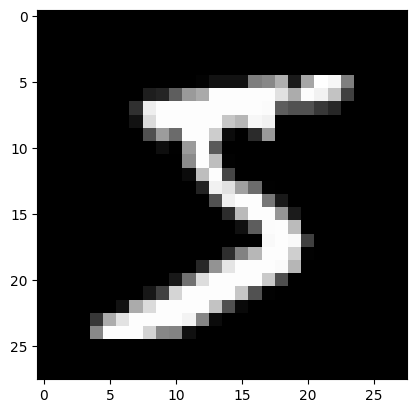

In [25]:
plt.imshow(normalized_img, cmap='gray')
#no visual difference

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation.

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

We want to make generalized network with can work any set of images so we need add color channel.

In [26]:
X_train.shape

(60000, 28, 28)

In [27]:
X_train[0][5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
       0.07058824, 0.49411765, 0.53333336, 0.6862745 , 0.10196079,
       0.6509804 , 1.        , 0.96862745, 0.49803922, 0.        ,
       0.        , 0.        , 0.        ], dtype=float32)

In [28]:
X_test.shape

(10000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

# Reshape the training data to include a channel dimension.
# This is necessary for Keras to process the data correctly in convolutional layers.
# The MNIST images are grayscale, so the channel dimension is 1.
# Reshape parameters: (number of images, height, width, number of channels)

In [29]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

# Confirm the new shape of the training data.
# Expected shape: (60000, 28, 28, 1), which means there are 60,000 images, each 28x28 in size, with 1 color channel.

In [30]:
X_train.shape

(60000, 28, 28, 1)

In [31]:
X_test.shape

(10000, 28, 28, 1)

# Training the Model

# Import necessary layers from Keras to build the CNN


In [32]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

# Initialize a sequential model to add layers in a feed-forward manner


# Add a convolutional layer:
# - 32 filters for extracting features, with a kernel size of (4x4) to process the input images
# - 'input_shape' should match the shape of the reshaped input data (28x28 images with 1 color channel)
# - 'relu' activation function is used to introduce non-linearity to the learning process

In [33]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D((2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))



model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Check Model Summary

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 25, 25, 32)          │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

## Train the Model

Model train on only 2 epochs

In [35]:
# THIS WILL TAKE AWHILE ON MOST COMPUTERS!!!
# CHANGE NUMBER OF EPOCHS IF NECESSARY
# YOUR ACCURACY MAY ALSO BE LOWER THAN WHAT IS SHOWN HERE SINCE THIS WAS TRAINED ON GPU


model.fit(X_train, y_cat_train, epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9147 - loss: 0.2781
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9850 - loss: 0.0479


## Evaluate the Model

In [36]:
model.metrics_names


['loss', 'compile_metrics']

In [37]:
model.evaluate(X_test,y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9838 - loss: 0.0437


[0.03507188707590103, 0.9882000088691711]

In [38]:
predictions = model.predict(X_test)

# Assuming you have already defined and trained your model
#predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [39]:
y_cat_test.shape

(10000, 10)

In [40]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [41]:
predictions[0]

array([3.1465351e-08, 4.4997304e-08, 9.8787257e-07, 2.4103809e-07,
       5.5320237e-10, 1.5275019e-09, 2.1727297e-12, 9.9999702e-01,
       5.3716022e-08, 1.6599016e-06], dtype=float32)

In [42]:
predicted_classes[0]

7

In [43]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [44]:
from sklearn.metrics import classification_report

#print(classification_report(y_test, predictions))

# Assuming you have 'y_test' (true labels) and 'predicted_classes' (predicted labels)
report = classification_report(y_test, predicted_classes)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Looks like the CNN performed quite well!